<h2 align = center style = 'color: blue'>Data Understanding & Exploration</h2> 

### Importing necessary libraries: 

In [1]:
# for preprocessing and filtration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

### Loading dataset

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head(4)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel


In [4]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [5]:
df.shape

(402005, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


### Visualising columns for better understanding:
#### Segregating the Categorical and Numeric columns.

In [7]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [8]:
df.select_dtypes(include=['number']).columns.tolist()

['public_reference', 'mileage', 'year_of_registration', 'price']

In [9]:
df.select_dtypes(include=['object']).columns.tolist()

['reg_code',
 'standard_colour',
 'standard_make',
 'standard_model',
 'vehicle_condition',
 'body_type',
 'fuel_type']

### Pairplot for Numeric Columns:
Exclude Irrelevant Columns: public_reference is just an identifier, it doesn't need to be in the pair plot.

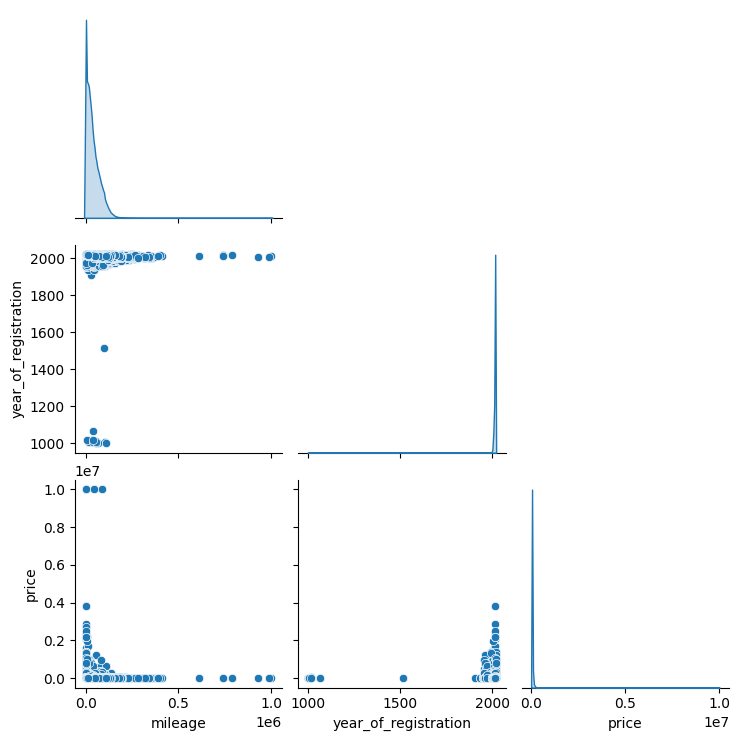

In [10]:
sns.pairplot(df[['mileage', 'year_of_registration', 'price']], diag_kind='kde', corner=True, palette='Set2')
plt.show()

1. Mileage Distribution:

    - The density plot for mileage shows that most cars have mileage concentrated around the lower end of the scale, indicating that high-mileage vehicles are less common.
   
2. Year of Registration vs. Mileage:

   - Cars with higher mileage generally correspond to older registration years.
   - A cluster of data points indicates a significant number of vehicles registered after 2000 with varying mileage values.
     
3. Price vs. Mileage:

   - Cars with lower mileage tend to have a higher price, suggesting a negative correlation between price and mileage.
   - There are outliers where high mileage still corresponds to relatively higher prices, likely indicating premium or well-maintained vehicles.
     
4. Year of Registration vs. Price:

   - Recent year registrations (post-2000) show a broader price range, with most higher-priced cars being newer.
   - Older vehicles have prices concentrated in the lower range.
     
5. Outliers:

   - Significant outliers exist across all plots, especially in price and mileage. These may need further investigation or removal during preprocessing.
     
6. Skewed Features:

   - The data distribution for mileage, year of registration, and price shows evidence of skewness, necessitating normalization or transformation for modeling.

### Visualising the categorical columns:

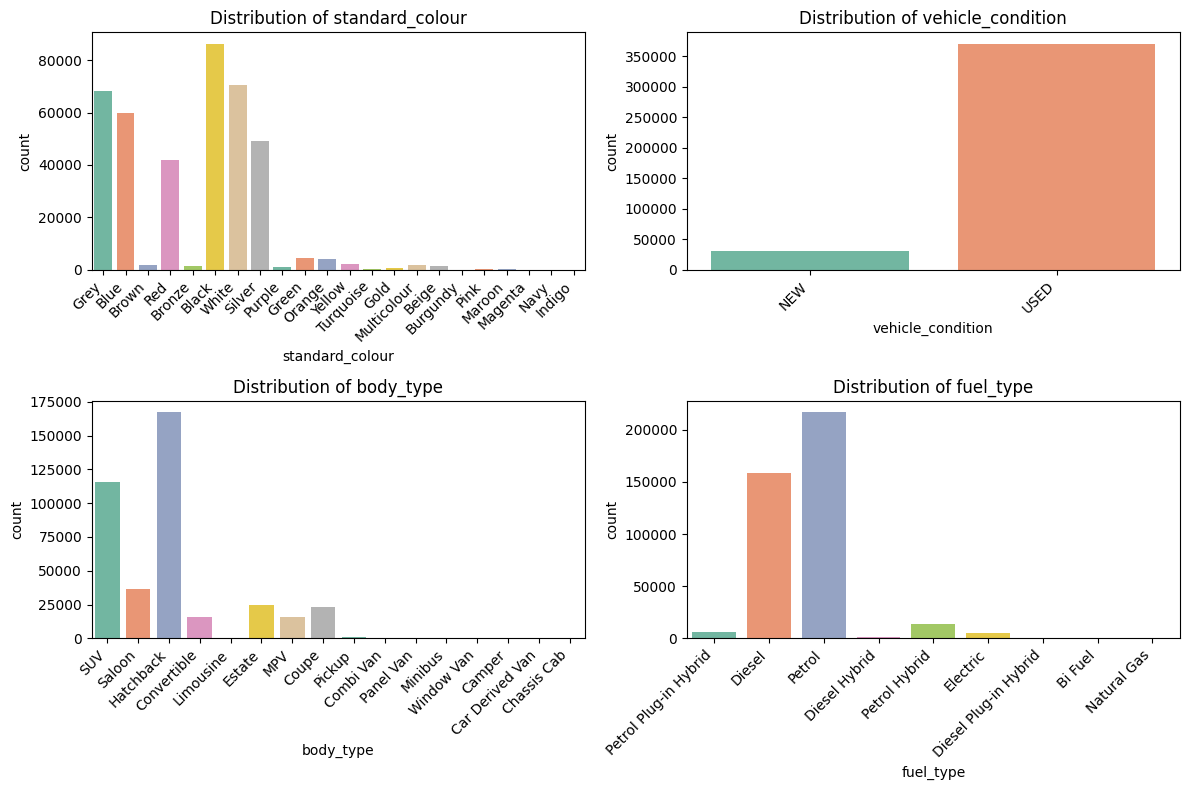

In [11]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots for each categorical column
categorical_cols = ['standard_colour', 'vehicle_condition', 'body_type', 'fuel_type']

# Loop through each categorical column and plot the distribution
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # 3 rows, 3 columns for subplot
    sns.countplot(x=col, data=df, palette='Set2', orient='v')  # 'orient' set to 'v' for vertical bars
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Findings**
- Colours: The most common standard colors appear to be White, Grey, and Black.
- Condition: The dataset seems to be heavily skewed towards "Used" vehicles.
- Body Types: SUVs and Hatchbacks seem to be the most prevalent body types.
- Fuel Types: Petrol and Diesel vehicles are the most common, with Hybrid and Electric vehicles

<h2 align = center style = 'color: blue'>Data Pre-Processing</h2> 

### Shape of the dataset:
**1. Number of Rows = 402005**<br>
**2. Number of Columns = 12**

In [12]:
df.shape

(402005, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


### Identifying the Outlier and Noise columns:
- Generally when we quantify the outliers columns we use numeric columns.
- Columns = 'public_reference', 'mileage', 'year_of_registration', 'price'
- Using statistical methodology interquartile range (IQR) to identify lower and upper bound values that are defining outliers

#### Dropping the Noise column: Public reference
Since we already know that the public reference is just a unique identification number column that does not add value.
Therefore we are dropping this column

In [14]:
df.drop(columns=['public_reference'], inplace=True)

#### Treating the outliers columns

#### Applying IQR: Interquartile range
**Understanding the IQR Method**

**IQR Formula:**

The IQR (Interquartile Range) is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data:

<h2 align = center >IQR =
𝑄
3
−
𝑄
1</h2>

**Outlier Bounds:**
- To identify outliers:

**Lower Bound:** Q1−1.5×IQR <br>
**Upper Bound:** Q3+1.5×IQR

In [15]:
# Columns for outlier detection
columns_to_check = ['mileage', 'year_of_registration', 'price']

# Outlier detection and handling using IQR method
def detect_and_handle_outliers(df, columns):
    outliers_summary = {}

    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_summary[column] = len(outliers)

        # Optionally, cap the outliers to the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
    return df, outliers_summary

# Apply the function to detect and handle outliers
df_cleaned, outliers_summary = detect_and_handle_outliers(df, columns_to_check)

# Print the summary of outliers detected in each column
for column, count in outliers_summary.items():
    print(f"Outliers detected in '{column}': {count}")

Outliers detected in 'mileage': 8181
Outliers detected in 'year_of_registration': 11915
Outliers detected in 'price': 26269


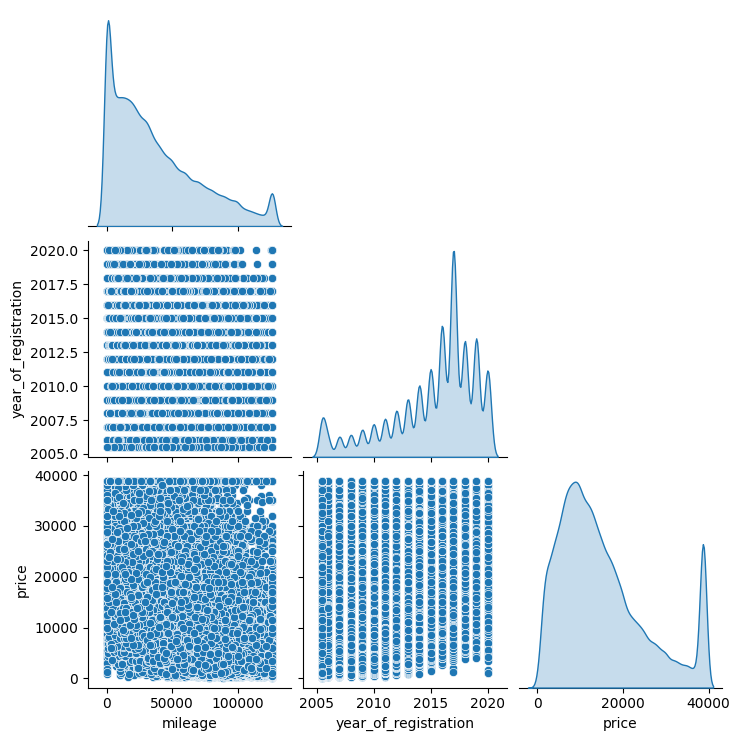

In [16]:
sns.pairplot(df[['mileage', 'year_of_registration', 'price']], diag_kind='kde', corner=True, palette='Set2')
plt.show()

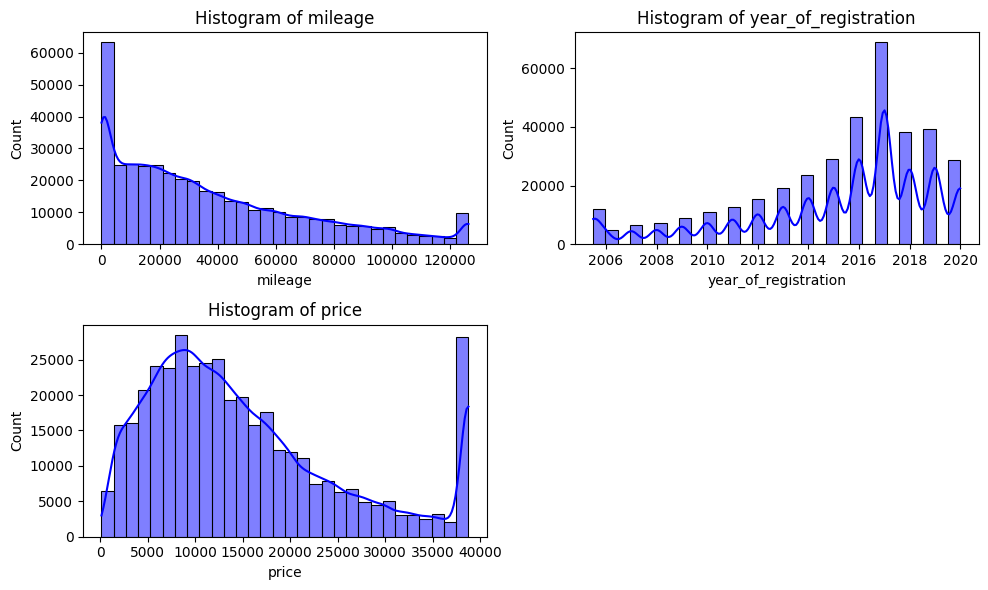

In [17]:
# 2. Histograms for distribution
plt.figure(figsize=(10, 6))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [18]:
df.shape

(402005, 11)

In [19]:
df.describe()

,mileage,year_of_registration,price
count,401878.000000,368694.000000,402005.000000
mean,37262.286160,2015.188339,15116.550266
std,33084.329629,3.782257,10196.799191
min,0.000000,2005.500000,120.000000
25%,10481.000000,2013.000000,7495.000000
50%,28629.500000,2016.000000,12600.000000
75%,56875.750000,2018.000000,20000.000000
max,126467.875000,2020.000000,38757.500000


### Explaining Outliers / Noise

Outliers are data points that stand out because they are much higher or lower than the rest of the data. Noise is just random errors or variations in the data. In our dataset:

- Public Reference (Noise Column): This column might have extreme values, but they likely don't affect predictions much.
- Mileage: Outliers here can happen from data mistakes or vehicles with really low or high mileage.
- Year of Registration: Outliers could be due to errors or rare cases like vintage cars.
- Price: Some prices might be extreme because of mispricing or rare luxury cars.

### Data Cleaning: finding null values
**Handling null values**

**Overview of the dataset :** The dataset contains 402,005 rows and 12 columns. Here's a summary of the data:

1. public_reference: Unique identifier for each car (irrelevant for prediction).
2. mileage: Distance traveled by the car (some missing values).
3. reg_code: Registration code (many missing values).
4. standard_colour: Car color (some missing values).
5. standard_make: Car manufacturer (no missing values).
6. standard_model: Car model (no missing values).
7. vehicle_condition: Whether the car is new or used.
8. year_of_registration: Year when the car was registered (some missing values).
9. price: Target variable for prediction (car price).
10. body_type: Type of car body (some missing values).
11. crossover_car_and_van: Boolean flag indicating if it's a crossover.
12. fuel_type: Type of fuel used (some missing values).

In [20]:
df.isnull().sum()

mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

### 1. Handling the numeric column:

**To handle missing values through imputation, we can use the following strategies:**

1. Numerical columns (e.g., mileage, year_of_registration): Use the median.
2. Categorical columns (e.g., reg_code, standard_colour, body_type, fuel_type): Use the mode (most frequent value).

#### Handling the mileage column

In [21]:
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

In [22]:
df.mileage.isna().sum()

np.int64(0)

#### Handling the years of reg column
Strategy: Impute with the median, as it reflects the central tendency of vehicle registration years.

In [23]:
df['year_of_registration'] = df['year_of_registration'].fillna(df['year_of_registration'].median())

In [24]:
df.year_of_registration.isna().sum()

np.int64(0)

### 2. Handling the categorical variable:

#### Handling the reg_code column

In [25]:
df['reg_code'] = df['reg_code'].fillna('Unknown')

In [26]:
df.reg_code.isna().sum()

np.int64(0)

#### Handling the standard colour column
Strategy: Impute with the most frequent body type (mode)

In [27]:
df['standard_colour'] = df['standard_colour'].fillna(df['standard_colour'].mode()[0])

In [28]:
df.standard_colour.isna().sum()

np.int64(0)

#### Handling the body type column
Strategy: Impute with the most frequent body type (mode)

In [29]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])

In [30]:
df.body_type.isna().sum()

np.int64(0)

#### Handling the fuel type column
Strategy: Impute with the most common fuel type

In [31]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [32]:
df.fuel_type.isna().sum()

np.int64(0)

In [33]:
df.isna().sum()

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [34]:
df.duplicated().describe()

count     402005
unique         2
top        False
freq      388042
dtype: object

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

All missing values have been successfully imputed. The dataset is now complete with no missing values.

<h2  style = 'color: purple'> Feature Engineering:</h2>

### Feature Engineering (deriving informative features):

#### Feature Engineering Steps:
- Feature engineering involves creating new features or transforming existing ones to make them more informative for analysis or modeling. Here’s how you can apply feature engineering to your car dataset:

<br>

**1. Create New Features:**

 * Vehicle age : From year_of_registration.
 * Mileage per Year: Divide mileage by car_age.
    
**2. Encode columns:**
 - Applying the one hot encoding or get dummies function to encode categorical columns(fuel_type, vehicle_condition...etc.)

**Feature Selection**

### 1. Creating New Cloumn
**=> Vehicle Age:**

In [36]:
# Create vehicle age feature
df['vehicle_age'] = 2025 - df['year_of_registration']

# Drop columns that won't be used
df.drop(['year_of_registration'], axis=1, inplace=True)

**=> Mileage_per_Year:**

In [37]:
df['mileage_per_year'] = df['mileage'] / df['vehicle_age'].replace(0, 1)

### Encoding and Scaling the Dataset
We have created a pipeline for Scaling and OneHotEncoding the dataset

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define features
numeric_features = ['mileage', 'vehicle_age', 'mileage_per_year']
categorical_features = ['reg_code', 'standard_colour', 'standard_make', 'standard_model',
                        'vehicle_condition', 'body_type', 'fuel_type', 'crossover_car_and_van']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Splitting the dataset into Train and test

In [39]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Log Transformation

In [40]:
skewed_features = ['mileage', 'mileage_per_year']
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])
    X_test[feature] = np.log1p(X_test[feature])

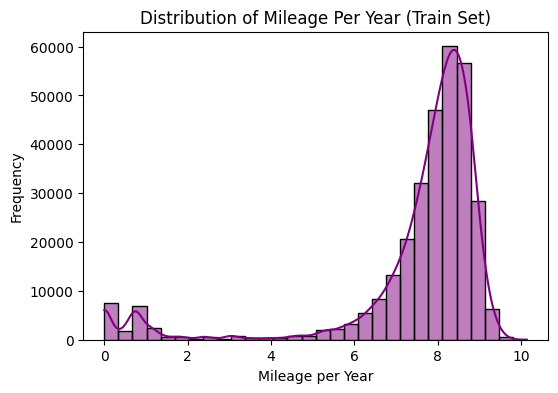

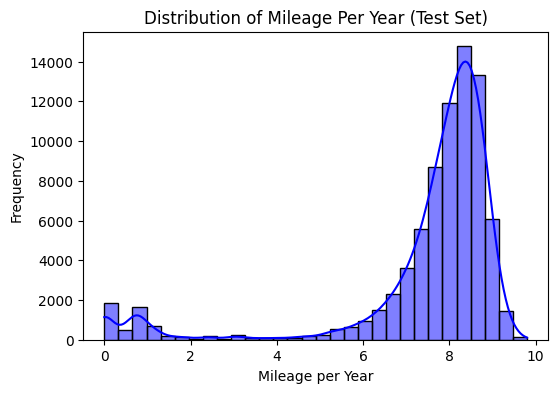

In [41]:
# Plotting the distribution of 'mileage_per_year'
# Datasets and titles for the loop
datasets = {'Train Set': X_train, 'Test Set': X_test}
colors = {'Train Set': 'purple', 'Test Set': 'blue'}

# Loop through datasets and plot
for name, data in datasets.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(data['mileage_per_year'], bins=30, kde=True, color=colors[name])
    plt.title(f'Distribution of Mileage Per Year ({name})')
    plt.xlabel('Mileage per Year')
    plt.ylabel('Frequency')
    plt.show()

### Model Training

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mileage', 'vehicle_age',
                                                   'mileage_per_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['reg_code',
                                                   'standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type',
                                                   'crossover_car_and_van'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1426.0870289455704
MSE: 5339283.870714984
RMSE: 2310.6890467380035


### Different algos with Evaluation matrix

In [50]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Prepare to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"Done training {name}. MAE: {mae:.2f}, R2: {r2:.2f}\n")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)

Training Linear Regression...
Done training Linear Regression. MAE: 2350.73, R2: 0.89

Training Lasso Regression...
Done training Lasso Regression. MAE: 2351.45, R2: 0.89

Training Decision Tree...
Done training Decision Tree. MAE: 1775.92, R2: 0.91

Training Gradient Boosting...
Done training Gradient Boosting. MAE: 3101.08, R2: 0.80

Training XGBoost...


AttributeError: 'super' object has no attribute '__sklearn_tags__'